In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import cast, DATE

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
    
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_year = print(dt.datetime(2017, 8, 23) - dt.timedelta(days = 365))
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > dt.datetime(2016, 8, 23)).order_by(Measurements.date).all()
for r in data:
    print(f"Date = {r.date} , Precipitation = {r.prcp}")


2016-08-23 00:00:00
Date = 2016-08-24 , Precipitation = 0.08
Date = 2016-08-24 , Precipitation = 2.15
Date = 2016-08-24 , Precipitation = 2.28
Date = 2016-08-24 , Precipitation = None
Date = 2016-08-24 , Precipitation = 1.22
Date = 2016-08-24 , Precipitation = 2.15
Date = 2016-08-24 , Precipitation = 1.45
Date = 2016-08-25 , Precipitation = 0.08
Date = 2016-08-25 , Precipitation = 0.08
Date = 2016-08-25 , Precipitation = 0.0
Date = 2016-08-25 , Precipitation = 0.0
Date = 2016-08-25 , Precipitation = 0.21
Date = 2016-08-25 , Precipitation = 0.06
Date = 2016-08-25 , Precipitation = 0.11
Date = 2016-08-26 , Precipitation = 0.0
Date = 2016-08-26 , Precipitation = 0.03
Date = 2016-08-26 , Precipitation = 0.02
Date = 2016-08-26 , Precipitation = 0.04
Date = 2016-08-26 , Precipitation = 0.0
Date = 2016-08-26 , Precipitation = 0.01
Date = 2016-08-27 , Precipitation = 0.0
Date = 2016-08-27 , Precipitation = 0.18
Date = 2016-08-27 , Precipitation = 0.02
Date = 2016-08-27 , Precipitation = 0.0
Da

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(data, columns = ['date', 'prcp'])
year_df.set_index('date')

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Precipitation')

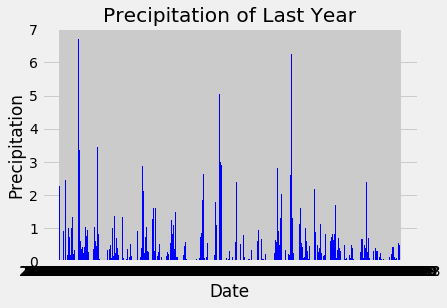

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = year_df['date']
y_axis = year_df['prcp']

plt.bar(x_axis, y_axis, color="blue")
plt.title("Precipitation of Last Year")
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [45]:
# Design a query to show how many stations are available in this dataset
stations = session.query(Stations.station).all()
stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [46]:
# Joining the two tables
columns = [Stations.name, Stations.latitude, Stations.longitude, Stations.elevation,
                             Measurements.prcp, Measurements.tobs, Measurements.date, Stations.id]
joined_tables = session.query(*columns).filter(Stations.station == Measurements.station).all()

joined_df = pd.DataFrame(joined_tables)
joined_df

,name,latitude,longitude,elevation,prcp,tobs,date,id
0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.08,65.0,2010-01-01,1
1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,63.0,2010-01-02,1
2,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,74.0,2010-01-03,1
3,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,76.0,2010-01-04,1
4,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,NaN,73.0,2010-01-06,1
...,...,...,...,...,...,...,...,...
19545,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.09,71.0,2017-08-19,9
19546,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,NaN,78.0,2017-08-20,9
19547,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.56,76.0,2017-08-21,9
19548,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.50,76.0,2017-08-22,9


In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_count = joined_df.groupby(['name'], sort = False).count()
# List the stations and the counts in descending order.
station_ordered = station_count.sort_values('id', ascending = False)

In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
min_temp = joined_df['tobs'].min()
# highest temperature recorded, and average temperature of the most active station?
max_temp = joined_df['tobs'].max()
avg_temp = joined_df['tobs'].mean()
print(f" Minimum temp = {min_temp} Maximum temp = {max_temp}")

 Minimum temp = 53.0 Maximum temp = 87.0


In [49]:
#average temperature of the most active station
most_active = joined_df.loc[(joined_df['name'] == 'WAIHEE 837.5, HI US')]
most_active
avg_temp = most_active['tobs'].mean()
avg_temp

71.66378066378067

(array([ 6., 10., 15., 27., 41., 58., 72., 85., 29.,  8.]),
 array([59. , 61.4, 63.8, 66.2, 68.6, 71. , 73.4, 75.8, 78.2, 80.6, 83. ]),
 <a list of 10 Patch objects>)

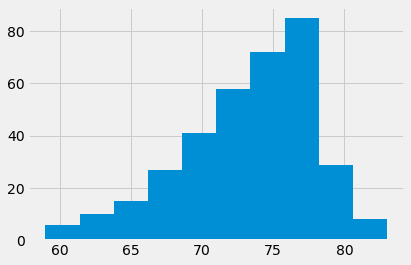

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurements.date, Measurements.station, Measurements.tobs).filter(Measurements.date > dt.datetime(2016, 8, 23), Measurements.station.like('%USC00519281%')).all()
data

temp_df = pd.DataFrame(data)
temp_df

bins = 12
plt.hist(temp_df['tobs'])


In [51]:
data = session.query(Measurements.date, Measurements.station, Measurements.tobs).filter(Measurements.date > dt.datetime(2016, 8, 23), Measurements.station.like('%USC00519281%')).all()
for x in data:
    print(x._asdict())

{'date': '2016-08-24', 'station': 'USC00519281', 'tobs': 77.0}
{'date': '2016-08-25', 'station': 'USC00519281', 'tobs': 80.0}
{'date': '2016-08-26', 'station': 'USC00519281', 'tobs': 80.0}
{'date': '2016-08-27', 'station': 'USC00519281', 'tobs': 75.0}
{'date': '2016-08-28', 'station': 'USC00519281', 'tobs': 73.0}
{'date': '2016-08-29', 'station': 'USC00519281', 'tobs': 78.0}
{'date': '2016-08-30', 'station': 'USC00519281', 'tobs': 77.0}
{'date': '2016-08-31', 'station': 'USC00519281', 'tobs': 78.0}
{'date': '2016-09-01', 'station': 'USC00519281', 'tobs': 80.0}
{'date': '2016-09-02', 'station': 'USC00519281', 'tobs': 80.0}
{'date': '2016-09-03', 'station': 'USC00519281', 'tobs': 78.0}
{'date': '2016-09-04', 'station': 'USC00519281', 'tobs': 78.0}
{'date': '2016-09-05', 'station': 'USC00519281', 'tobs': 78.0}
{'date': '2016-09-06', 'station': 'USC00519281', 'tobs': 73.0}
{'date': '2016-09-07', 'station': 'USC00519281', 'tobs': 74.0}
{'date': '2016-09-08', 'station': 'USC00519281', 'tobs'

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
